In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.vq import vq, kmeans, kmeans2, whiten

%matplotlib inline

In [3]:
def convert_to_float(value):
    """
    Transforms argument value to float;
    Replaces the comma in a string variable with a dot and rounds the value to two decimal places;
    
    Parameters
    --------
    value: float
    
    Returns
    --------
    float
    
    """
    value = float(str(value).replace(",", "."))
    value = round(value, 2)
    return value

#######################################################################################################################

### Подготовка данных

In [27]:
# Загрузка датафрейма из CSV файла;
cleared = pd.read_csv('../output/cleared.csv')

# Приведение типов колонок датафрейма к значению с плавающей запятой;
cleared['warp_a'] = cleared.warp_a.apply(convert_to_float)
cleared['warp_b'] = cleared.warp_b.apply(convert_to_float)
cleared['weft_a'] = cleared.weft_a.apply(convert_to_float)
cleared['weft_b'] = cleared.weft_b.apply(convert_to_float)
cleared['warp_mean'] = cleared.warp_mean.apply(convert_to_float)
cleared['weft_mean'] = cleared.weft_mean.apply(convert_to_float)
cleared['warp_dens'] = cleared.warp_dens.apply(convert_to_float)
cleared['weft_dens'] = cleared.weft_dens.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
cleared['warp_nominal'] = round((cleared['warp_a'] + cleared['warp_b']) / 2, 2)
cleared['weft_nominal'] = round((cleared['weft_a'] + cleared['weft_b']) / 2, 2)

In [11]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../data/textiles.csv', sep=';')

# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)
textiles['warp_mean'] = textiles.warp_mean.apply(convert_to_float)
textiles['weft_mean'] = textiles.weft_mean.apply(convert_to_float)
textiles['warp_dens'] = textiles.warp_dens.apply(convert_to_float)
textiles['weft_dens'] = textiles.weft_dens.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

In [28]:
warp_thick = cleared['warp_mean'].copy(deep=True)
weft_thick = cleared['weft_mean'].copy(deep=True)
warp_nominal = cleared['warp_nominal'].copy(deep=True)
weft_nominal = cleared['weft_nominal'].copy(deep=True)

# Получение нормальзованных значений параметров для кластеризации;
threads_whitened = whiten(list(zip(warp_thick, weft_thick, warp_nominal, weft_nominal)))

# получаем список с параметрами нитей;
threads = list(zip(cleared['warp_dens'].tolist(), cleared['weft_dens'].tolist(), cleared['warp_nominal'].tolist(), cleared['weft_nominal'].tolist()))

# получаем центроиды и метки кластеров;
threads_centroids, threads_labels = kmeans2(threads_whitened, 3, iter=10)

cleared['threads_labels'] = threads_labels

print(threads)

print(threads_whitened)

[(13.0, 8.0, 0.75, 0.75), (16.0, 10.0, 0.4, 0.7), (18.0, 6.0, 0.5, 0.15), (30.0, 9.0, 0.35, 0.4), (24.0, 10.0, 0.5, 0.55), (24.0, 10.0, 0.5, 0.5), (11.0, 7.0, 0.55, 0.55), (22.0, 12.0, 0.65, 0.65), (13.0, 8.0, 0.7, 0.8), (12.0, 8.0, 0.55, 0.8), (12.0, 9.0, 0.75, 0.7), (14.0, 10.0, 0.75, 0.7), (14.0, 10.0, 0.75, 0.7), (22.0, 16.0, 0.3, 0.35), (18.0, 14.0, 0.4, 0.5), (15.0, 8.0, 0.65, 0.65), (14.0, 7.0, 0.7, 0.65), (26.0, 10.0, 0.5, 0.5), (24.0, 9.0, 0.45, 0.45), (28.0, 10.0, 0.65, 0.35), (34.0, 12.0, 0.48, 0.45), (24.0, 12.0, 0.55, 0.55), (14.0, 10.0, 0.65, 0.65), (10.0, 7.0, 0.65, 0.9), (12.0, 8.0, 0.65, 0.8), (16.0, 12.0, 0.45, 0.75), (16.0, 14.0, 0.35, 0.35), (13.0, 8.0, 0.75, 0.9), (24.0, 10.0, 0.35, 0.5), (23.0, 12.0, 0.35, 0.45), (12.0, 8.0, 0.55, 0.55), (36.0, 13.0, 0.2, 0.35), (12.0, 10.0, 0.7, 0.8), (32.0, 14.0, 0.3, 0.5), (14.0, 16.0, 0.5, 0.45), (24.0, 10.0, 0.45, 0.45), (36.0, 14.0, 0.4, 0.45), (24.0, 10.0, 0.4, 0.4), (22.0, 12.0, 0.4, 0.4), (36.0, 14.0, 0.3, 0.3), (36.0, 14

In [14]:
cluster_1 = cleared[cleared['threads_labels'] == 0]
cluster_2 = cleared[cleared['threads_labels'] == 1]
cluster_3 = cleared[cleared['threads_labels'] == 2]

In [15]:
cluster_one = {}
cluster_one['n_bands'] = cluster_1.query('type == "n_band"')
cluster_one['m_bands'] = cluster_1.query('type == "m_band"')
cluster_one['w_bands'] = cluster_1.query('type == "w_band"')
cluster_one['funeral_shrouds'] = cluster_1.query('type == "funeral_shroud"')

cluster_two = {}
cluster_two['n_bands'] = cluster_2.query('type == "n_band"')
cluster_two['m_bands'] = cluster_2.query('type == "m_band"')
cluster_two['w_bands'] = cluster_2.query('type == "w_band"')
cluster_two['funeral_shrouds'] = cluster_2.query('type == "funeral_shroud"')

cluster_three = {}
cluster_three['n_bands'] = cluster_3.query('type == "n_band"')
cluster_three['m_bands'] = cluster_3.query('type == "m_band"')
cluster_three['w_bands'] = cluster_3.query('type == "w_band"')
cluster_three['funeral_shrouds'] = cluster_3.query('type == "funeral_shroud"')

In [16]:
cluster_one_stats = {}
cluster_two_stats = {}
cluster_three_stats = {}

cluster_one_stats['warp_dens_mean'] = round(cluster_1.warp_dens.mean(), 2)
cluster_one_stats['weft_dens_mean'] = round(cluster_1.weft_dens.mean(), 2)
cluster_one_stats['warp_mean'] = round(cluster_1.warp_nominal.mean(), 2)
cluster_one_stats['weft_mean'] = round(cluster_1.weft_nominal.mean(), 2)
cluster_one_stats['warp_dens_std'] = round(cluster_1.warp_dens.std(), 2)
cluster_one_stats['weft_dens_std'] = round(cluster_1.weft_dens.std(), 2)
cluster_one_stats['warp_nominal_std'] = round(cluster_1.warp_nominal.std(), 2)
cluster_one_stats['weft_nominal_std'] = round(cluster_1.weft_nominal.std(), 2)

cluster_two_stats['warp_dens_mean'] = round(cluster_2.warp_dens.mean(), 2)
cluster_two_stats['weft_dens_mean'] = round(cluster_2.weft_dens.mean(), 2)
cluster_two_stats['warp_mean'] = round(cluster_2.warp_nominal.mean(), 2)
cluster_two_stats['weft_mean'] = round(cluster_2.weft_nominal.mean(), 2)
cluster_two_stats['warp_dens_std'] = round(cluster_2.warp_dens.std(), 2)
cluster_two_stats['weft_dens_std'] = round(cluster_2.weft_dens.std(), 2)
cluster_two_stats['warp_nominal_std'] = round(cluster_2.warp_nominal.std(), 2)
cluster_two_stats['weft_nominal_std'] = round(cluster_2.weft_nominal.std(), 2)

cluster_three_stats['warp_dens_mean'] = round(cluster_3.warp_dens.mean(), 2)
cluster_three_stats['weft_dens_mean'] = round(cluster_3.weft_dens.mean(), 2)
cluster_three_stats['warp_mean'] = round(cluster_3.warp_nominal.mean(), 2)
cluster_three_stats['weft_mean'] = round(cluster_3.weft_nominal.mean(), 2)
cluster_three_stats['warp_dens_std'] = round(cluster_3.warp_dens.std(), 2)
cluster_three_stats['weft_dens_std'] = round(cluster_3.weft_dens.std(), 2)
cluster_three_stats['warp_nominal_std'] = round(cluster_3.warp_nominal.std(), 2)
cluster_three_stats['weft_nominal_std'] = round(cluster_3.weft_nominal.std(), 2)

In [17]:
print()
print("=========================")
print("В первом кластере содержится " + str(len(cluster_1))  + " тканей")
print("Во втором кластере содержится " + str(len(cluster_2)) + " тканей")
print("В третьем кластере содержится " + str(len(cluster_3)) + " тканей")
print()
print("=========================")
print("Узких бинтов в первом кластере - " + str(len(cluster_one['n_bands'])))
print("Средних бинтов в первом кластере - " + str(len(cluster_one['m_bands'])))
print("Широких бинтов в первом кластере - " + str(len(cluster_one['w_bands'])))
print("Погребальных пелен в первом кластере - " + str(len(cluster_one['funeral_shrouds'])))
print("Неклассифицированных тканей в первом кластере - " + str(len(cluster_1) -
                                                               len(cluster_one['n_bands']) -
                                                               len(cluster_one['m_bands']) -
                                                               len(cluster_one['w_bands']) -
                                                               len(cluster_one['funeral_shrouds'])
                                                              ))
print()
print("=========================")
print()
print("Узких бинтов в первом кластере - " + str(len(cluster_two['n_bands'])))
print("Средних бинтов во втором кластере - " + str(len(cluster_two['m_bands'])))
print("Широких бинтов во втором кластере - " + str(len(cluster_two['w_bands'])))
print("Погребальных пелен во втором кластере - " + str(len(cluster_two['funeral_shrouds'])))
print("Неклассифицированных тканей во втором кластере - " + str(len(cluster_2) -
                                                                len(cluster_two['n_bands']) -
                                                                len(cluster_two['m_bands']) -
                                                                len(cluster_two['w_bands']) -
                                                                len(cluster_two['funeral_shrouds'])
                                                               ))
print()
print("=========================")
print()
print("Узких бинтов в третьем кластере - " + str(len(cluster_three['n_bands'])))
print("Средних бинтов в третьем кластере - " + str(len(cluster_three['m_bands'])))
print("Широких бинтов в третьем кластере - " + str(len(cluster_three['w_bands'])))
print("Погребальных пелен в третьем кластере - " + str(len(cluster_three['funeral_shrouds'])))
print("Неклассифицированных тканей в третьем кластере - " + str(len(cluster_3) -
                                                                len(cluster_three['n_bands']) -
                                                                len(cluster_three['m_bands']) -
                                                                len(cluster_three['w_bands']) -
                                                                len(cluster_three['funeral_shrouds'])
                                                               ))
print()
print("=========================")
print("Кластер 1:")
print()
print("Средняя плотность по основе - " + str(cluster_one_stats['warp_dens_mean']))
print("Средняя плотность по утку - " + str(cluster_one_stats['weft_dens_mean']))
print("Средняя толщина нитей основы - " + str(cluster_one_stats['warp_mean']))
print("Средняя толщина нитей утка - " + str(cluster_one_stats['weft_mean']))
print("Сдандартное отклонение плотности по основе - " + str(cluster_one_stats['warp_dens_std']))
print("Стандартное отклонение плотности по утку - " + str(cluster_one_stats['weft_dens_std']))
print("Стандартное отклонение толщины нити по основе - " + str(cluster_one_stats['warp_nominal_std']))
print("Стандартное отклонение толщины нити по утку - " + str(cluster_one_stats['weft_nominal_std']))
print()
print("=========================")
print("Кластер 2:")
print("")
print("Средняя плотность по основе - " + str(cluster_two_stats['warp_dens_mean']))
print("Средняя плотность по утку - " + str(cluster_two_stats['weft_dens_mean']))
print("Средняя толщина нитей основы - " + str(cluster_two_stats['warp_mean']))
print("Средняя толщина нитей утка - " + str(cluster_two_stats['weft_mean']))
print("Сдандартное отклонение плотности по основе - " + str(cluster_two_stats['warp_dens_std']))
print("Стандартное отклонение плотности по утку - " + str(cluster_two_stats['weft_dens_std']))
print("Стандартное отклонение толщины нити по основе - " + str(cluster_two_stats['warp_nominal_std']))
print("Стандартное отклонение толщины нити по утку - " + str(cluster_two_stats['weft_nominal_std']))
print("")
print("=========================")
print("Кластер 3:")
print()
print("Средняя плотность по основе - " + str(cluster_three_stats['warp_dens_mean']))
print("Средняя плотность по утку - " + str(cluster_three_stats['weft_dens_mean']))
print("Средняя толщина нитей основы - " + str(cluster_three_stats['warp_mean']))
print("Средняя толщина нитей утка - " + str(cluster_three_stats['weft_mean']))
print("Сдандартное отклонение плотности по основе - " + str(cluster_three_stats['warp_dens_std']))
print("Стандартное отклонение плотности по утку - " + str(cluster_three_stats['weft_dens_std']))
print("Стандартное отклонение толщины нити по основе - " + str(cluster_three_stats['warp_nominal_std']))
print("Стандартное отклонение толщины нити по утку - " + str(cluster_three_stats['weft_nominal_std']))
print()
print("=========================")


В первом кластере содержится 41 тканей
Во втором кластере содержится 83 тканей
В третьем кластере содержится 162 тканей

Узких бинтов в первом кластере - 13
Средних бинтов в первом кластере - 12
Широких бинтов в первом кластере - 0
Погребальных пелен в первом кластере - 3
Неклассифицированных тканей в первом кластере - 13


Узких бинтов в первом кластере - 28
Средних бинтов во втором кластере - 16
Широких бинтов во втором кластере - 8
Погребальных пелен во втором кластере - 7
Неклассифицированных тканей во втором кластере - 24


Узких бинтов в третьем кластере - 49
Средних бинтов в третьем кластере - 46
Широких бинтов в третьем кластере - 10
Погребальных пелен в третьем кластере - 16
Неклассифицированных тканей в третьем кластере - 41

Кластер 1:

Средняя плотность по основе - 13.4
Средняя плотность по утку - 8.28
Средняя толщина нитей основы - 0.69
Средняя толщина нитей утка - 0.72
Сдандартное отклонение плотности по основе - 3.36
Стандартное отклонение плотности по утку - 1.68
Станд

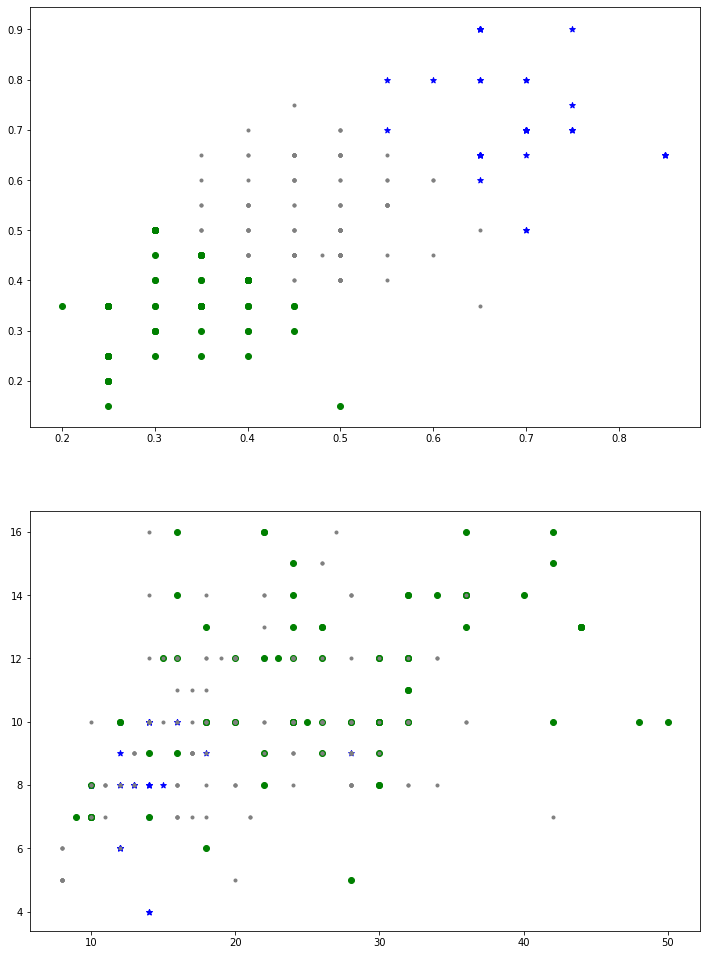

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(12, 17))

ax[0].scatter(cluster_1['warp_nominal'].tolist(), cluster_1['weft_nominal'].tolist(), marker='*', color='blue')
ax[0].scatter(cluster_2['warp_nominal'].tolist(), cluster_2['weft_nominal'].tolist(), marker='o', color='green')
ax[0].scatter(cluster_3['warp_nominal'].tolist(), cluster_3['weft_nominal'].tolist(), marker='.', color='gray')

ax[1].scatter(cluster_1['warp_dens'].tolist(), cluster_1['weft_dens'].tolist(), marker='*', color='blue')
ax[1].scatter(cluster_2['warp_dens'].tolist(), cluster_2['weft_dens'].tolist(), marker='o', color='green')
ax[1].scatter(cluster_3['warp_dens'].tolist(), cluster_3['weft_dens'].tolist(), marker='.', color='gray')

plt.show()